### Data Preprocessing Techniques

In [3]:
# load Scikit-lean's downsanpled iris dataset

from sklearn import datasets
iris_dataset = datasets.load_iris()


In [5]:
# Explore the dataset

print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
print(iris_dataset.data.shape)

(150, 4)


In [9]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print(iris_dataset.target.shape)

(150,)


In [13]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


## Obtaining an Overview of the Data

### Loading the dataset

In [89]:
import numpy as np
import pandas as pd


# Load the contents of the file into a pandas dataframe
input_file = "‪C:\\Users\\A.W\\Downloads\\awsmlbook-chapter2-master\\awsmlbook-chapter2-master\\datasets\\titanic_dataset\\original\\train.csv"

# Remove hidden Unicode characters
#input_file = input_file.encode('utf-8').decode('utf-8')

# input_file = input_file.strip()

df_titanic = pd.read_csv(input_file)

OSError: [Errno 22] Invalid argument: '\u202aC:\\Users\\A.W\\Downloads\\awsmlbook-chapter2-master\\awsmlbook-chapter2-master\\datasets\\titanic_dataset\\original\\train.csv'

#### Fixed the unicode character problem

In [92]:
import numpy as np
import pandas as pd
from pathlib import Path

# Correct file path using pathlib to avoid Unicode issues
input_file = Path(r"C:\Users\A.W\Downloads\awsmlbook-chapter2-master\awsmlbook-chapter2-master\datasets\titanic_dataset\original\train.csv")

# Read the CSV file into a DataFrame
df_titanic = pd.read_csv(input_file)




In [94]:
df_titanic.shape

(891, 12)

In [96]:
# Titles of the 12 columns
print(df_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Findig missing values

In [99]:
# How many missing values?

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
# Another way to determine the number of missing values
# in a dataframe

df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
# for all columns to be displayed set the following line

pd.set_option('display.max_columns', None)


df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:

import random
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 4) # pandas displays not more than 4 characters


df_random30 = pd.DataFrame({random.randint(1, 100) for _ in range(30)}) # 30 unique numbers between 1 and 100
df_random30.head()

,0
0,3
1,4
2,7
3,10
4,12


#### Finding out if a dataframe has an index


In [124]:
print(df_titanic.index.name)

None


In [128]:
df_titanic.head()

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


In [130]:
df_titanic.set_index("PassengerId", inplace=True)

In [134]:
# Does the dataframe has a named index? if so, what is it?

print(df_titanic.index.name)

PassengerId


In [136]:
# Viewing the first 5 rows
pd.set_option('display.max_columns', None)

df_titanic.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
# How many rows and columns in the dataframe
# After the index has been set

df_titanic.shape

(891, 11)

In [143]:
# Extract the target attribute ('Survived') into a separate dataframe for model training
# This isolates our prediction target from the feature variables
df_titanic_target = df_titanic.loc[:, ['Survived']]

# Create a features dataframe by removing the target column ('Survived')
# This leaves us with only the predictor variables for model training
df_titanic_features = df_titanic.drop(['Survived'], axis=1)

-  When the target that your machine learning model is trying to predict is categorical 
(binary or multi-class), it is useful to know the distribution of values in the training dataset per 
category.

In [146]:
# Distribution of target values
# What is the split between two classes of the target variable?

df_titanic_target['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

- Value_counts() function can b used on numeric columns in addition to categorical columns.
- By default the value_counts() function will not pick NAN values,
-  hence necessary to include dropna=false parameter as below:

In [149]:
# unique values and counts of categorical attibute 'Embarked'
# includes NAN markers

df_titanic_features['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

### Visual Representation of the distribution of the target values
#### Histrogram

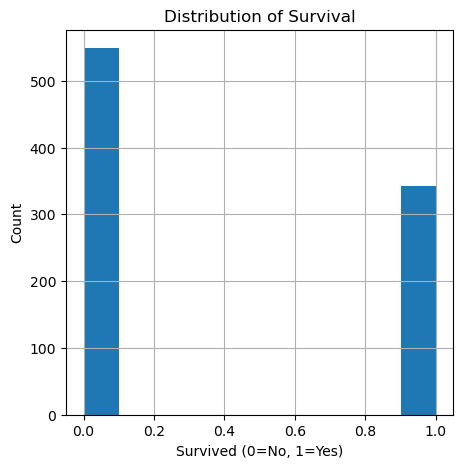

In [176]:
# Histrogram of target variable

%matplotlib inline
import matplotlib.pyplot as plt
df_titanic_target.hist(figsize=(5, 5))
plt.title('Distribution of Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

#### Histograms to get an overview of the distribution of feature values

- The hist() function provided will only generate histograms
- for numeric values.
- The only numeric features in the Titanic dataset are:
- Age, Fare, Pclass, Parch, and SibSp

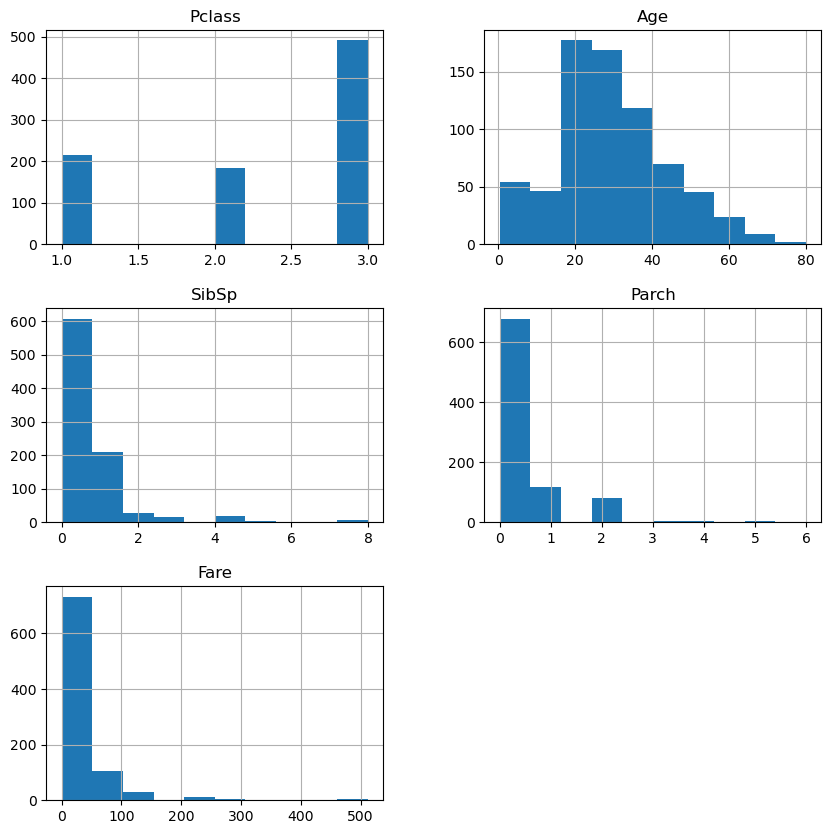

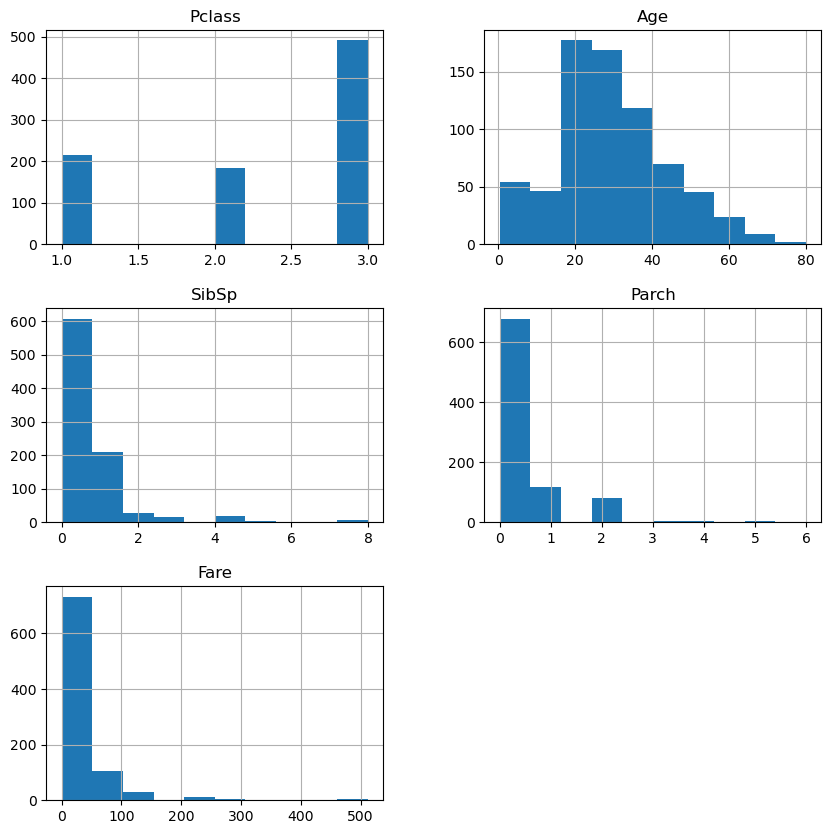

In [183]:
# Histogram of features

df_titanic_features.hist(figsize=(10,10))
plt.show()

#### Creating a histogram of a single numeric attribute and specify the number of equal-width bins along the x-axis.

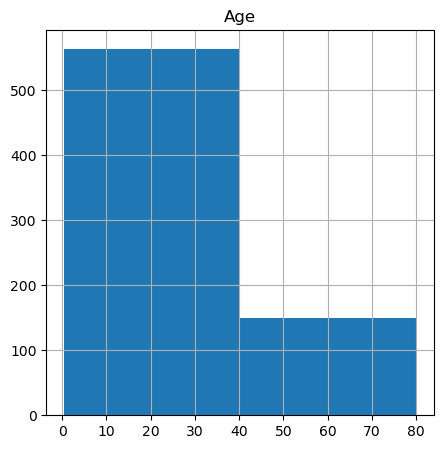

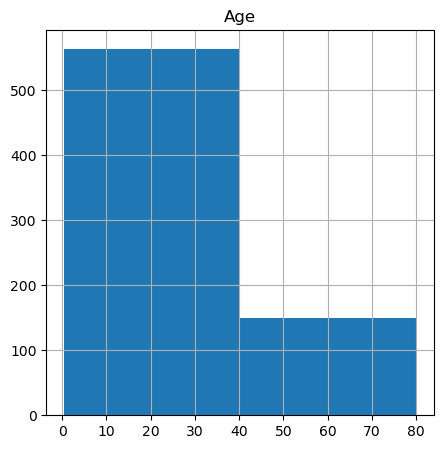

In [189]:
# histogram of single feature - Age

# it is a good idea to try different bin widths to get 
# better idea of the distribution of values.

df_titanic_features.hist(column='Age', figsize=(5,5), bins=2)
plt.show()

- Since the value_counts() function works on both numeric and categorical features, you could generate a histogram of a categorical feature by using the output of the value_counts() function.
- The snippet below demonstrates this approach on the Embarked categorical feature.

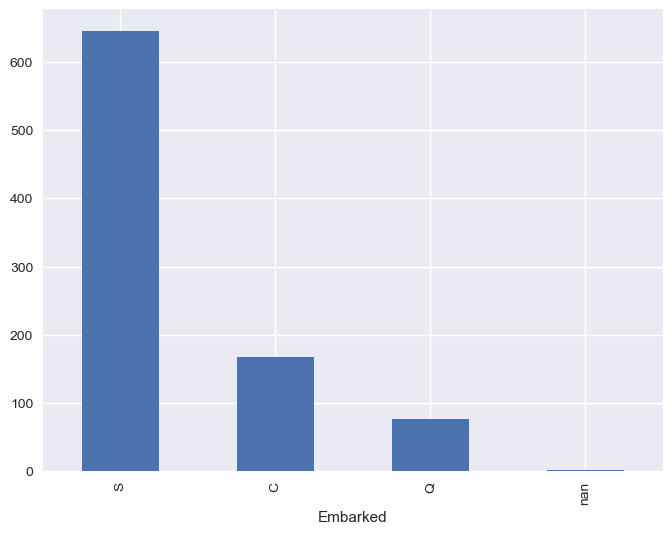

In [214]:
# Histogram of categorical attribute 'Embarked'
# Computed from the output of the value_counts() function
# includes NAN markers
import matplotlib.pyplot as plt
%matplotlib inline


vc = df_titanic_features['Embarked'].value_counts(dropna=False)
vc.plot(kind='bar', figsize=(8, 6)) # Add figure size for better visibility

# Show the plot
plt.show()

- The statistical characteristics of these variables and the correlation between them can provide useful insights into the training data.
- Pandas provides a describe() function that can be used on dataframes to obtain statistical information on the numerical attributes within the dataframe.

In [217]:
# Get statistical characteristics of the data

df_titanic_features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


- Information on quartiles and statistical characteristics of a feature is often represented using a box plot.
- You can use the boxplot() function of the dataframe to create a box plot of all numeric features.

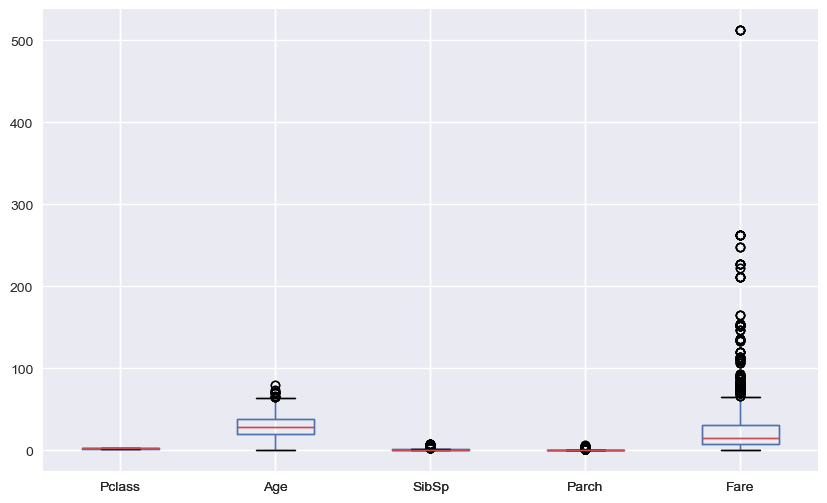

In [222]:
# Create a box plot of numeric features
df_titanic_features.boxplot(figsize=(10, 6))
plt.show()

- Information on the correlation between input features and the target can be helpful in picking out the best fatures to use for model building and predictions.
- Information on correlation between features themselves can be helpful in reducing the number of features and the general risk of overfitting.
- Pandas provides a corr() function that can be used to compute Pearson's correlation coefficient between columns of a dataframe.

In [245]:
# Correlation between th target variable and the features

df_titanic.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [247]:
# Select only numerical columns for correlation
# Exclude string/object columns that can't be used in correlation
numerical_columns = df_titanic.select_dtypes(include=['float64', 'int64']).columns
correlation = df_titanic[numerical_columns].corr()

# Display the correlation matrix
correlation

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Visualizing Correlations

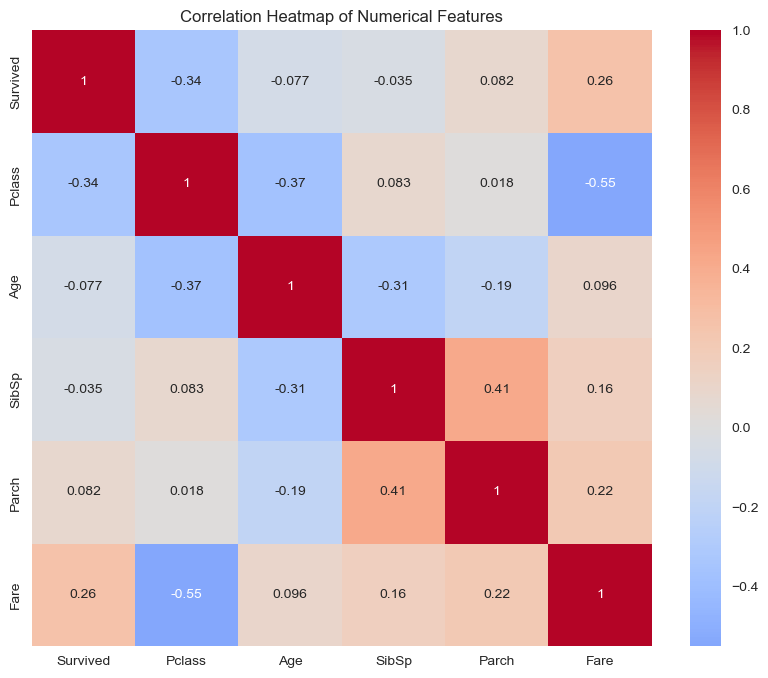

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- The darker the color, the stronger the correlation (positive or negative).
- Pearson's correlation coefficient will only detect linear correlation between variables.

In [266]:
# What features show the strongest correlation with the target variable?

# Select only numerical columns for correlation analysis
numerical_columns = df_titanic.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_titanic[numerical_columns].corr()

# Sort correlations with 'Survived' in descending order
corr_matrix['Survived'].sort_values(ascending=False)

# Alternative approach if you want to see column names:
# print("\nNumerical columns used:", numerical_columns.tolist())

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

### Another way to get information on the correlation between features
#### Scatter plots
    - Create between pairs of features to visualize their relationship

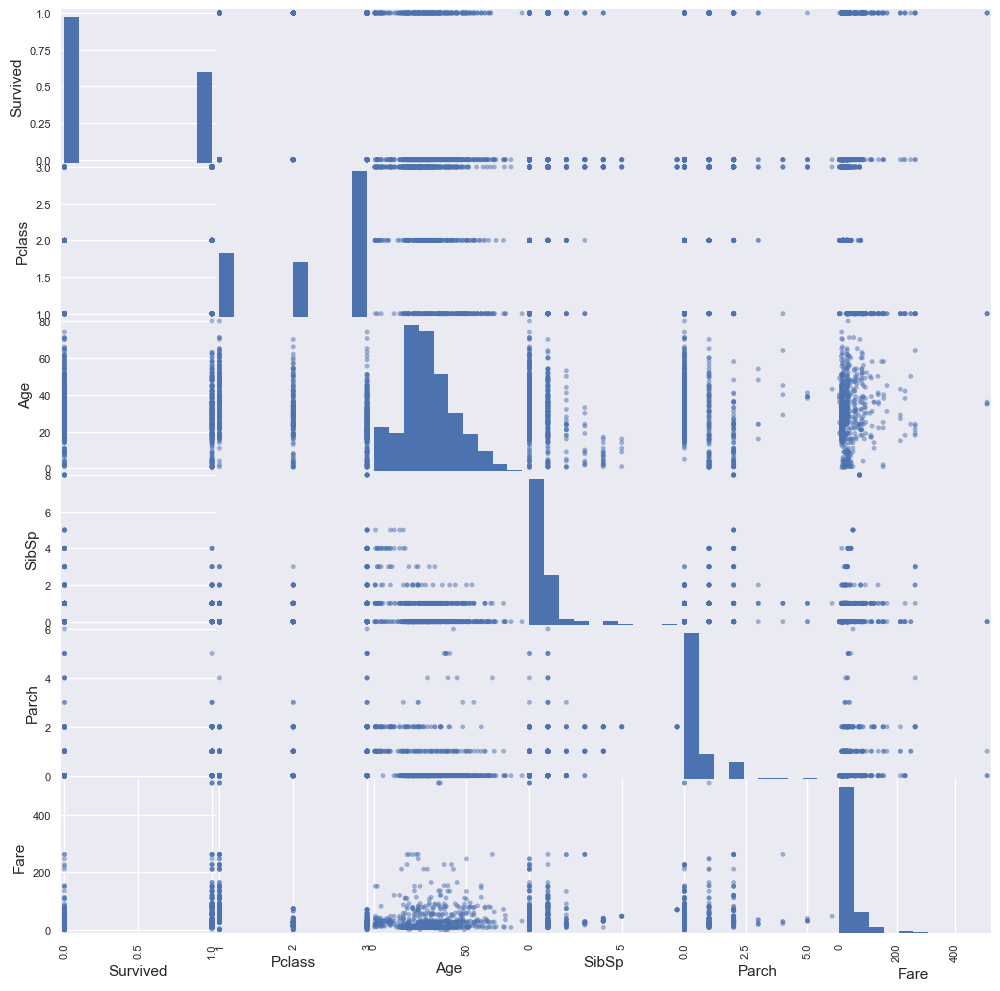

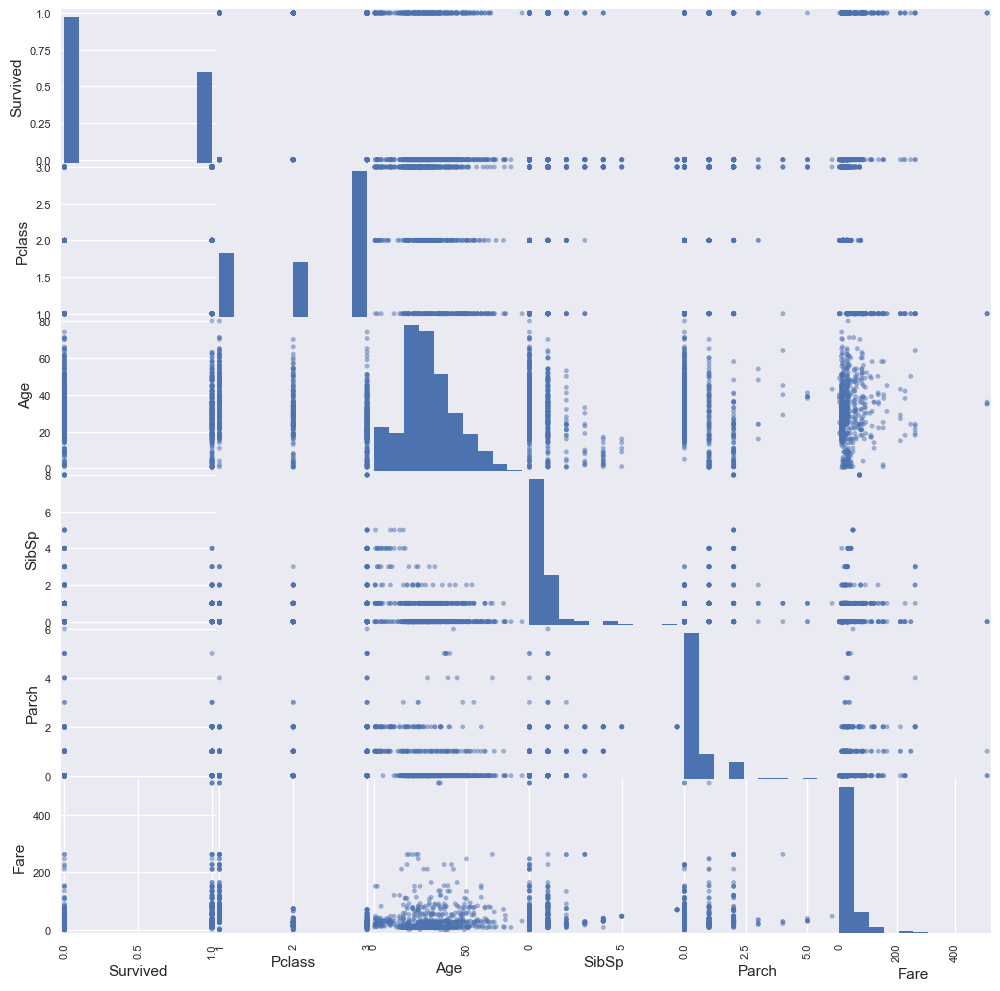

In [273]:
# Visualize relationship between features using
# a matrix of scatter plots.

from pandas.plotting import scatter_matrix
scatter_matrix(df_titanic, figsize=(12,12))
plt.show()